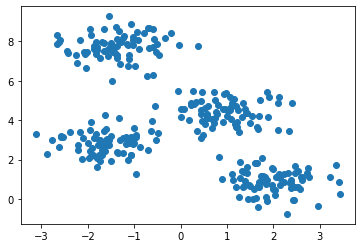

In [47]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#conda install matplotlib 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
#conda install -c anaconda scikit-learn
X,y = make_blobs(n_samples=300, centers=4, cluster_std=0.60,random_state=0);
#X,y不一樣
#生成高斯的點 #sample個數,中心個數,標準差，固定state會出一樣數據
plt.scatter(X[:,0],X[:,1])
#畫出散點圖 #X[:,0]: 取第0行的所有東西
#print(x.shape)


d:\Anaconda\envs\sunny\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  f"KMeans is known to have a memory leak on Windows "


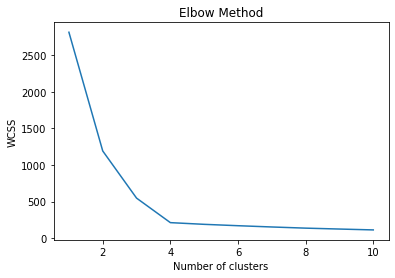

In [48]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    #n_clusters : 分成幾類 
    #init : 初始質選定方法
    #max_iter : 預設值=300 ,執行一次k-means算法所進行的最大疊代數
    #n_init : 預設值=10 ,用不同的質心初始化值運行算法的次數，最終解是在inertia意義下選出的最優結果
    #random_state : numpy的隨機數生成器
    kmeans.fit(X)
    #配上面X
    wcss.append(kmeans.inertia_)
    #誤差平方和(SSE) = 各群平方距離加總
plt.plot(range(1, 11), wcss)
#plot:繪圖(x,y) //range1~10
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#我們使用不同數量的集群訓練多個模型並存儲 intertia_ 的值。屬性（WCSS）

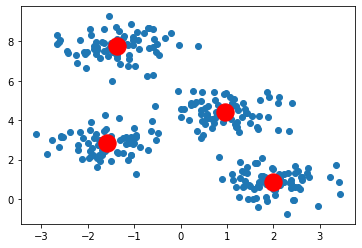

In [49]:
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0],X[:,1])
#散布圖
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

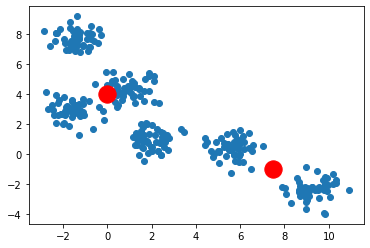

In [50]:
#Quest 1
X,y=make_blobs(n_samples=300, centers=6, cluster_std=0.60,random_state=0);
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0],X[:,1])
#散布圖
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

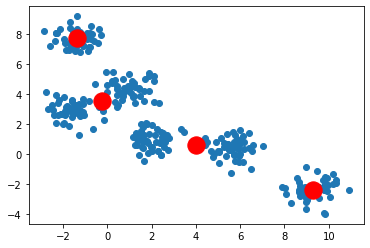

In [51]:
#Quest 1
X,y=make_blobs(n_samples=300, centers=6, cluster_std=0.60,random_state=0);
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0],X[:,1])
#散布圖
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

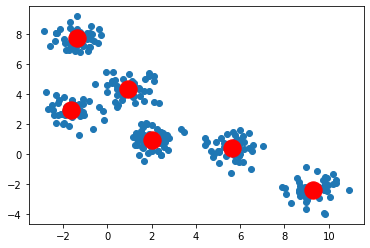

In [52]:
#Quest 1
X,y=make_blobs(n_samples=300, centers=6, cluster_std=0.60,random_state=0);
kmeans = KMeans(n_clusters=6,init='k-means++',max_iter=300,n_init=10,random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0],X[:,1])
#散布圖
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
url =  'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [54]:
#Shows testing data
#Determine the column names
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'categories']
iris = pd.read_csv(url, header=None, names=col_names)
#讀取一個CSV的檔案 #補充:iris:鳶尾花
### PLOT ###
category_1 = iris[iris['categories']=='Iris-setosa']
category_2 = iris[iris['categories']=='Iris-virginica']
category_3 = iris[iris['categories']=='Iris-versicolor']
#補充categories:類別

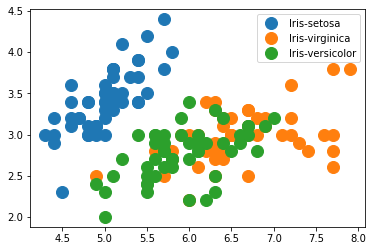

In [55]:
fig, ax = plt.subplots()
ax.plot(category_1['sepal_length'],category_1['sepal_width'],marker='o',linestyle='',ms=12,label='Iris-setosa');
#畫圖(x軸, y軸, 圖案o=圓形, 連接的線形狀(沒有則無線), 圖案size, 指定名稱)
ax.plot(category_2['sepal_length'],category_2['sepal_width'],marker='o',linestyle='',ms=12,label='Iris-virginica');
ax.plot(category_3['sepal_length'],category_3['sepal_width'],marker='o',linestyle='',ms=12,label='Iris-versicolor');
ax.legend()
#畫圖右上角的圖例
plt.show()

In [56]:
# Creating the dictionary of categories and 成形 the labels vector.
iris_class = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
iris['labels'] = [iris_class[i] for i in iris.categories]

# creating the data and label vectors. iris消除了不相關的列。
X = iris.drop(['categories','labels'], axis=1)
#labels: 要删除的行列的名字
#axis: 默认为0，指删除行，因此删除columns时要指定axis=1
Y = iris.labels

# Split the data into train/test.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
#train_test_split:data本身, random_state(固定結果)

from sklearn.neighbors import KNeighborsClassifier

##分類 Call the model with k=10 neighbors(10個樣本點).
knn = KNeighborsClassifier(n_neighbors=10)

## Fit(安置) the model using the training data.
knn.fit(X_train, Y_train)
## Test phase.
print(knn.score(X_test, Y_test))
#knn.score: 計算測試數據的平均準確度

0.9736842105263158


In [57]:
# Creating the dictionary of categories and 成形 the labels vector.
iris_class = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
iris['labels'] = [iris_class[i] for i in iris.categories]

# creating the data and label vectors. iris消除了不相關的列。
X = iris.drop(['categories','labels'], axis=1)
#labels: 要删除的行列的名字
#axis: 默认为0，指删除行，因此删除columns时要指定axis=1
Y = iris.labels

# Split the data into train/test.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
#train_test_split:data本身, random_state(固定結果)

from sklearn.neighbors import KNeighborsClassifier

##分類 Call the model with k=10 neighbors(10個樣本點).
knn = KNeighborsClassifier(n_neighbors=10)

## Fit(安置) the model using the training data.
knn.fit(X_train, Y_train)
## Test phase.
print(knn.score(X_test, Y_test))
#knn.score: 計算測試數據的平均準確度

0.9736842105263158


In [58]:
#Question 2: 改n_neithbors看看差異
#Categories by sepal 用花萼分類

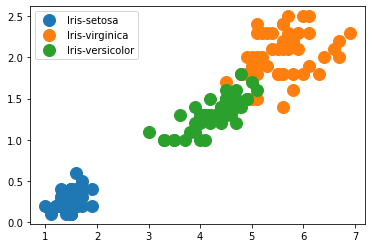

In [59]:
#Question 3:
#Categories by petal:用花瓣分類
fig, ax = plt.subplots()
ax.plot(category_1['petal_length'],category_1['petal_width'],marker='o',linestyle='',ms=12,label='Iris-setosa');
#畫圖(x軸, y軸, 圖案o=圓形, 連接的線形狀(沒有則無線), 圖案size, 指定名稱)
ax.plot(category_2['petal_length'],category_2['petal_width'],marker='o',linestyle='',ms=12,label='Iris-virginica');
ax.plot(category_3['petal_length'],category_3['petal_width'],marker='o',linestyle='',ms=12,label='Iris-versicolor');
ax.legend()
#畫圖右上角的圖例
plt.show()

Text(0.5, 1.0, 'Test data: 200 points x3 clusters.')

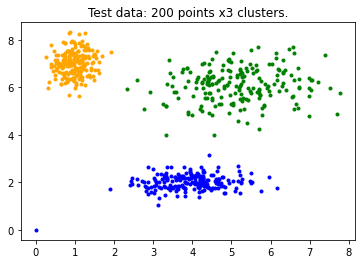

In [62]:
#Fuzzy C Means
from __future__ import division, print_function
#pip install future
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
#pip install -U scikit-fuzzy

colors =['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
# Define three cluster centers
centers = [[4, 2],[1, 7],[5, 6]]
# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],[0.3,0.5],[1.1, 0.7]]
# Generate test data
np.random.seed(42) #seed: 亂數固定結果
xpts = np.zeros(1) #元素都將會是0
ypts = np.zeros(1)
labels = np.zeros(1)
for i , ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    #zip:把多個元素放一起，組成新的表
    #enumerate: i(第i個) mu(第i個的a) sigma(第i個的b) #a:centers b:sigmas
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))
    #hstack: 水平堆疊","前後的東西

#Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels==label],ypts[labels ==label],'.', #'.':用.顯示資料
    color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

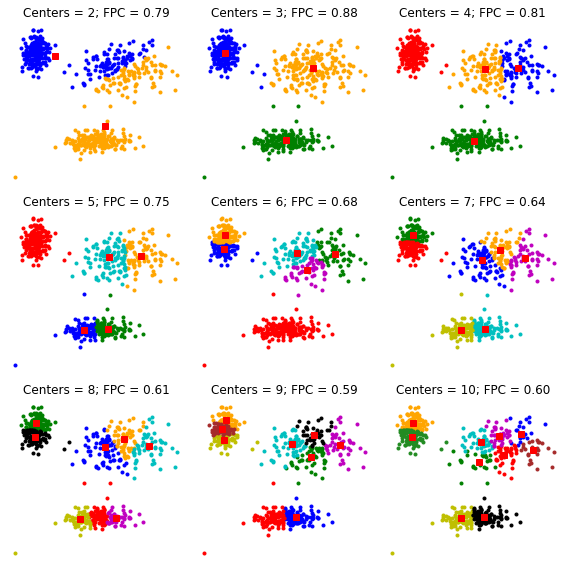

In [73]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8)) #存放子圖3*3,每圖大小8*8
#figure:畫布 axes: figure中一個元素(圖片)的整套座標軸
alldata = np.vstack((xpts, ypts)) #把A,B stack起來
fpcs = []

#用for依序畫每張子圖
for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)
    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0) #argmax: 返回最大值的索引 #axis指定的轴(看每一行) 0:行
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
        ypts[cluster_membership == j], '.',color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')#關閉坐標軸
fig1.tight_layout()

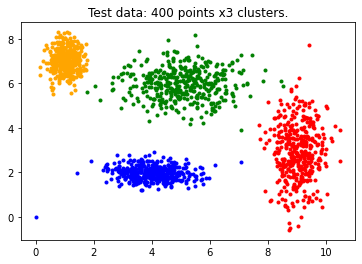

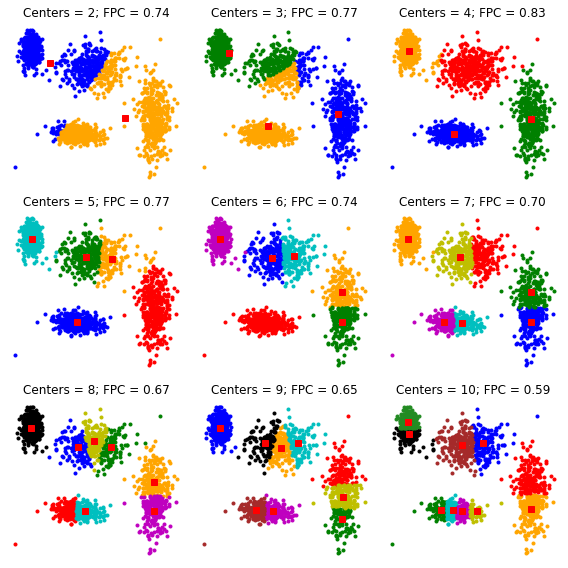

In [84]:
#Question 4:
#Fuzzy C Means
from __future__ import division, print_function
#pip install future
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
#pip install -U scikit-fuzzy

colors =['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
# Define three cluster centers
centers = [[4, 2],[1, 7],[5, 6],[9,3]]
# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8,0.3],[0.3, 0.5],[1.1, 0.7],[0.5,1.2]]
# Generate test data
np.random.seed(42) #seed: 亂數固定結果
xpts = np.zeros(1) #元素都將會是0
ypts = np.zeros(1)
labels = np.zeros(1)
for i , ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    #zip:把多個元素放一起，組成新的表
    #enumerate: i(第i個) mu(第i個的a) sigma(第i個的b) #a:centers b:sigmas
    xpts = np.hstack((xpts, np.random.standard_normal(400) * xsigma + xmu))#題目要改400point
    ypts = np.hstack((ypts, np.random.standard_normal(400) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(400) * i))
    #hstack: 水平堆疊","前後的東西

#Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(4): #分4個label
    ax0.plot(xpts[labels==label],ypts[labels ==label],'.',
    color=colors[label])
    #'.':用.顯示資料
ax0.set_title('Test data: 400 points x3 clusters.')

# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8)) #存放子圖3*3,每圖大小8*8
#figure:畫布 axes: figure中一個元素(圖片)的整套座標軸
alldata = np.vstack((xpts, ypts)) #把A,B stack起來
fpcs = []
for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)
    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    #argmax: 返回最大值的索引 #axis指定的轴(看每一行) 0:行
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
        ypts[cluster_membership == j], '.',color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')
    #關閉坐標軸
fig1.tight_layout()